In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 

In [2]:
Univ = pd.read_csv("Universities_Clustering.csv")

In [3]:
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [5]:
Univ.shape

(25, 7)

In [6]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())	/	(i.max()	-	i.min())
    return (x)


In [7]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(Univ.iloc[:,1:])

In [8]:
from scipy.cluster.hierarchy import linkage 

In [9]:
import scipy.cluster.hierarchy as sch # for creating dendrogram 

In [10]:
type(df_norm)

pandas.core.frame.DataFrame

In [11]:
#p = np.array(df_norm) # converting into numpy array format 

In [12]:
z = linkage(df_norm, method="complete",metric="euclidean")

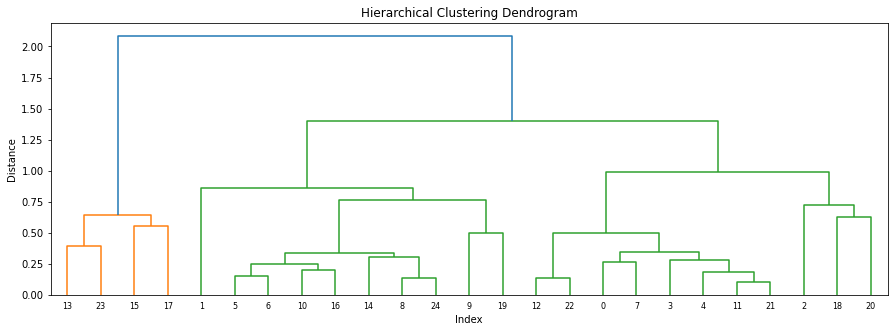

In [13]:
plt.figure(figsize=(15, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [14]:
help(linkage)
# Now applying AgglomerativeClustering choosing 3 as clusters from the dendrogram
from	sklearn.cluster	import	AgglomerativeClustering 
h_complete	=	AgglomerativeClustering(n_clusters=3,	linkage='complete',affinity = "euclidean").fit(df_norm) 

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.
    
    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents t

In [15]:
cluster_labels=pd.Series(h_complete.labels_)
Univ['clust']=cluster_labels # creating a  new column and assigning it to new column 
Univ = Univ.iloc[:,[7,0,1,2,3,4,5,6]]
Univ.head()

,clust,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0,Brown,1310,89,22,13,22704,94
1,2,CalTech,1415,100,25,6,63575,81
2,0,CMU,1260,62,59,9,25026,72
3,0,Columbia,1310,76,24,12,31510,88
4,0,Cornell,1280,83,33,13,21864,90


In [16]:
# getting aggregate mean of each cluster
Univ.iloc[:,2:].groupby(Univ.clust).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust,,,,,,
0,1260.0,78.818182,39.181818,12.818182,21446.909091,87.636364
1,1061.5,38.750000,70.000000,19.250000,9953.000000,71.750000
2,1355.5,89.000000,26.900000,10.000000,40897.200000,91.700000


In [17]:
# creating a csv file 
Univ.to_csv("University.csv",encoding="utf-8")

In [18]:
import os



In [20]:
os.getcwd()
os.chdir('e:\\Kmeans')